<a href="https://colab.research.google.com/github/shoulhafiz/python_data_science/blob/master/Kmeans_mall_customer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://malaya-dataset.s3-ap-southeast-1.amazonaws.com/tutorial/mall-customer.csv

--2019-11-06 06:37:01--  https://malaya-dataset.s3-ap-southeast-1.amazonaws.com/tutorial/mall-customer.csv
Resolving malaya-dataset.s3-ap-southeast-1.amazonaws.com (malaya-dataset.s3-ap-southeast-1.amazonaws.com)... 52.219.48.51
Connecting to malaya-dataset.s3-ap-southeast-1.amazonaws.com (malaya-dataset.s3-ap-southeast-1.amazonaws.com)|52.219.48.51|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4086 (4.0K) [text/csv]
Saving to: ‘mall-customer.csv’

mall-customer.csv   100%[===================>]   3.99K  --.-KB/s    in 0s      

2019-11-06 06:37:02 (149 MB/s) - ‘mall-customer.csv’ saved [4086/4086]



In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('mall-customer.csv')


In [4]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


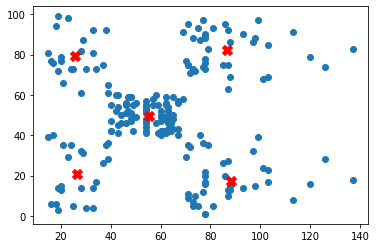

In [5]:
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans
from sklearn.cluster import KMeans

kmean = KMeans(n_clusters = 5).fit(df[['Annual Income (k$)', 
                               'Spending Score (1-100)']])

plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.scatter(kmean.cluster_centers_[:,0], kmean.cluster_centers_[:,1],
            label = 'centroids', marker = 'X', s = 100, c = 'red')
plt.show()

labels = kmean.labels_

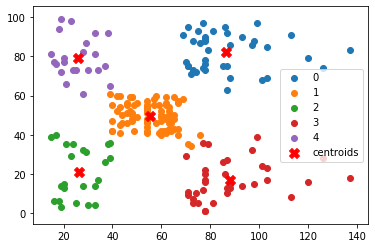

In [6]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

for label in np.unique(labels):
  filtered = X[labels == label]
  plt.scatter(filtered[:,0], filtered[:,1], label = label)

plt.scatter(kmean.cluster_centers_[:,0], kmean.cluster_centers_[:,1],
            label = 'centroids', marker = 'X', s = 100, c = 'red')
plt.legend()
plt.show()

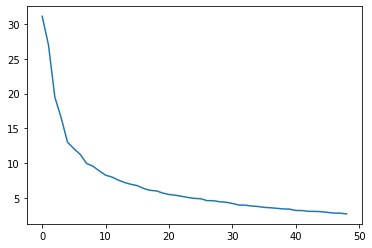

In [7]:
from scipy.spatial.distance import cdist

elbows = []
for i in range(1, 50):
  kmean = KMeans(n_clusters = i).fit(X)
  centroids = kmean.cluster_centers_
  elbow = sum(np.min(cdist(X, centroids), axis = 1)) / X.shape[0]
  elbows.append(elbow)

plt.plot(elbows)